In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

As features (ou características) da base de dados carregada são as seguintes:

    battery_power: Potência da bateria do dispositivo (provavelmente em mAh).
    blue: Disponibilidade de Bluetooth (0 ou 1, indicando ausência ou presença, respectivamente).
    clock_speed: Velocidade de relógio do processador do dispositivo (provavelmente em GHz).
    dual_sim: Suporte a dual SIM (0 ou 1).
    fc: Megapixels da câmera frontal.
    four_g: Disponibilidade de 4G (0 ou 1).
    int_memory: Memória interna do dispositivo (provavelmente em GB).
    m_dep: Profundidade do dispositivo móvel em cm.
    mobile_wt: Peso do dispositivo móvel (em gramas).
    n_cores: Número de cores do processador.
    pc: Megapixels da câmera principal (traseira).
    px_height: Altura da resolução de pixel da tela.
    px_width: Largura da resolução de pixel da tela.
    ram: Memória RAM do dispositivo (provavelmente em MB ou GB).
    sc_h: Altura da tela do dispositivo em cm.
    sc_w: Largura da tela do dispositivo em cm.
    talk_time: Tempo máximo de conversação em uma única carga de bateria (provavelmente em horas).
    three_g: Disponibilidade de 3G (0 ou 1).
    touch_screen: Presença de tela sensível ao toque (0 ou 1).
    wifi: Disponibilidade de WiFi (0 ou 1).

Além dessas features, a base de dados também inclui a coluna price_range, que parece ser a variável alvo (target), indicando a faixa de preço do dispositivo. Essa base de dados é provavelmente usada para modelar a relação entre as características técnicas de um telefone celular e seu preço de mercado. ​
​

In [2]:
input_file = 'train.csv'

features = ['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g', 'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g', 'touch_screen', 'wifi']
# 6 - intern memory / 13 - ram
target = 'price_range'

df = pd.read_csv(input_file)

df.describe()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [3]:
# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,[target]].values

# Z-score normalization
x_zscore = StandardScaler().fit_transform(x)
normalized_zscore = pd.DataFrame(x_zscore, columns = features)
normalized_zscore = pd.concat([normalized_zscore, df[[target]]], axis = 1)
normalized_zscore.describe()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,...,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2.000000e+03,2000.000000
mean,2.149392e-16,-1.243450e-17,-1.545430e-16,8.082424e-17,5.861978e-17,1.048051e-16,-9.592327e-17,-1.030287e-16,1.278977e-16,-7.727152e-17,...,1.181277e-16,6.084022e-17,-1.811884e-16,4.884981e-17,-5.506706e-17,1.421085e-16,1.421085e-17,-5.417888e-17,1.421085e-17,1.500000
std,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,...,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.000250e+00,1.118314
min,-1.678817e+00,-9.900495e-01,-1.253064e+00,-1.019184e+00,-9.928904e-01,-1.043966e+00,-1.656260e+00,-1.393304e+00,-1.702391e+00,-1.539175e+00,...,-1.454027e+00,-1.739251e+00,-1.722711e+00,-1.734608e+00,-1.324131e+00,-1.649584e+00,-1.786861e+00,-1.006018e+00,-1.014099e+00,0.000000
25%,-8.804033e-01,-9.900495e-01,-1.007906e+00,-1.019184e+00,-7.624947e-01,-1.043966e+00,-8.845346e-01,-1.046495e+00,-8.829695e-01,-6.647678e-01,...,-8.167289e-01,-8.719579e-01,-8.453168e-01,-7.849833e-01,-8.649215e-01,-9.173306e-01,5.596406e-01,-1.006018e+00,-1.014099e+00,0.750000
50%,-2.849593e-02,-9.900495e-01,-2.727384e-02,9.811771e-01,-3.017032e-01,9.578860e-01,-2.563229e-03,-6.069151e-03,2.122020e-02,-2.275644e-01,...,-1.828116e-01,-1.045034e-02,2.055123e-02,-7.276497e-02,-1.761069e-01,-2.013697e-03,5.596406e-01,9.940179e-01,9.860966e-01,1.500000
75%,8.575560e-01,1.010051e+00,8.307794e-01,9.811771e-01,6.198797e-01,9.578860e-01,8.794082e-01,1.034357e+00,8.406421e-01,1.084046e+00,...,6.810064e-01,8.828792e-01,8.670548e-01,8.768595e-01,7.423125e-01,9.133032e-01,5.596406e-01,9.940179e-01,9.860966e-01,2.250000
max,1.728812e+00,1.010051e+00,1.811412e+00,9.811771e-01,3.384628e+00,9.578860e-01,1.761380e+00,1.727974e+00,1.688320e+00,1.521249e+00,...,2.963672e+00,1.727608e+00,1.727851e+00,1.589078e+00,2.808756e+00,1.645557e+00,5.596406e-01,9.940179e-01,9.860966e-01,3.000000


In [4]:
# Min-Max normalization
x_minmax = MinMaxScaler().fit_transform(x)
normalized_minmax = pd.DataFrame(x_minmax, columns = features)
normalized_minmax = pd.concat([normalized_minmax, df[[target]]], axis = 1)
normalized_minmax.describe()


,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,0.492664,0.4950,0.408900,0.509500,0.226816,0.521500,0.484621,0.446389,0.502075,0.502929,...,0.329137,0.501679,0.499255,0.521893,0.320389,0.500611,0.761500,0.503000,0.507000,1.500000
std,0.293533,0.5001,0.326402,0.500035,0.228497,0.499662,0.292673,0.320462,0.294997,0.326834,...,0.226419,0.288518,0.289880,0.300946,0.242022,0.303553,0.426273,0.500116,0.500076,1.118314
min,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.234302,0.0000,0.080000,0.000000,0.052632,0.000000,0.225806,0.111111,0.241667,0.285714,...,0.144260,0.250167,0.254276,0.285714,0.111111,0.222222,1.000000,0.000000,0.000000,0.750000
50%,0.484302,0.0000,0.400000,1.000000,0.157895,1.000000,0.483871,0.444444,0.508333,0.428571,...,0.287755,0.498665,0.505211,0.500000,0.277778,0.500000,1.000000,1.000000,1.000000,1.500000
75%,0.744322,1.0000,0.680000,1.000000,0.368421,1.000000,0.741935,0.777778,0.750000,0.857143,...,0.483291,0.756342,0.750534,0.785714,0.500000,0.777778,1.000000,1.000000,1.000000,2.250000
max,1.000000,1.0000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000


In [5]:
# plote a matriz de correlação
# corr = normalized_minmax.corr()
# fig, ax = plt.subplots(figsize=(10, 10))
# cax = ax.matshow(corr, cmap='coolwarm')
# fig.colorbar(cax)
# plt.xticks(range(len(corr.columns)), corr.columns, rotation='vertical')
# plt.yticks(range(len(corr.columns)), corr.columns)
# plt.title('Correlation Matrix')
# plt.show()


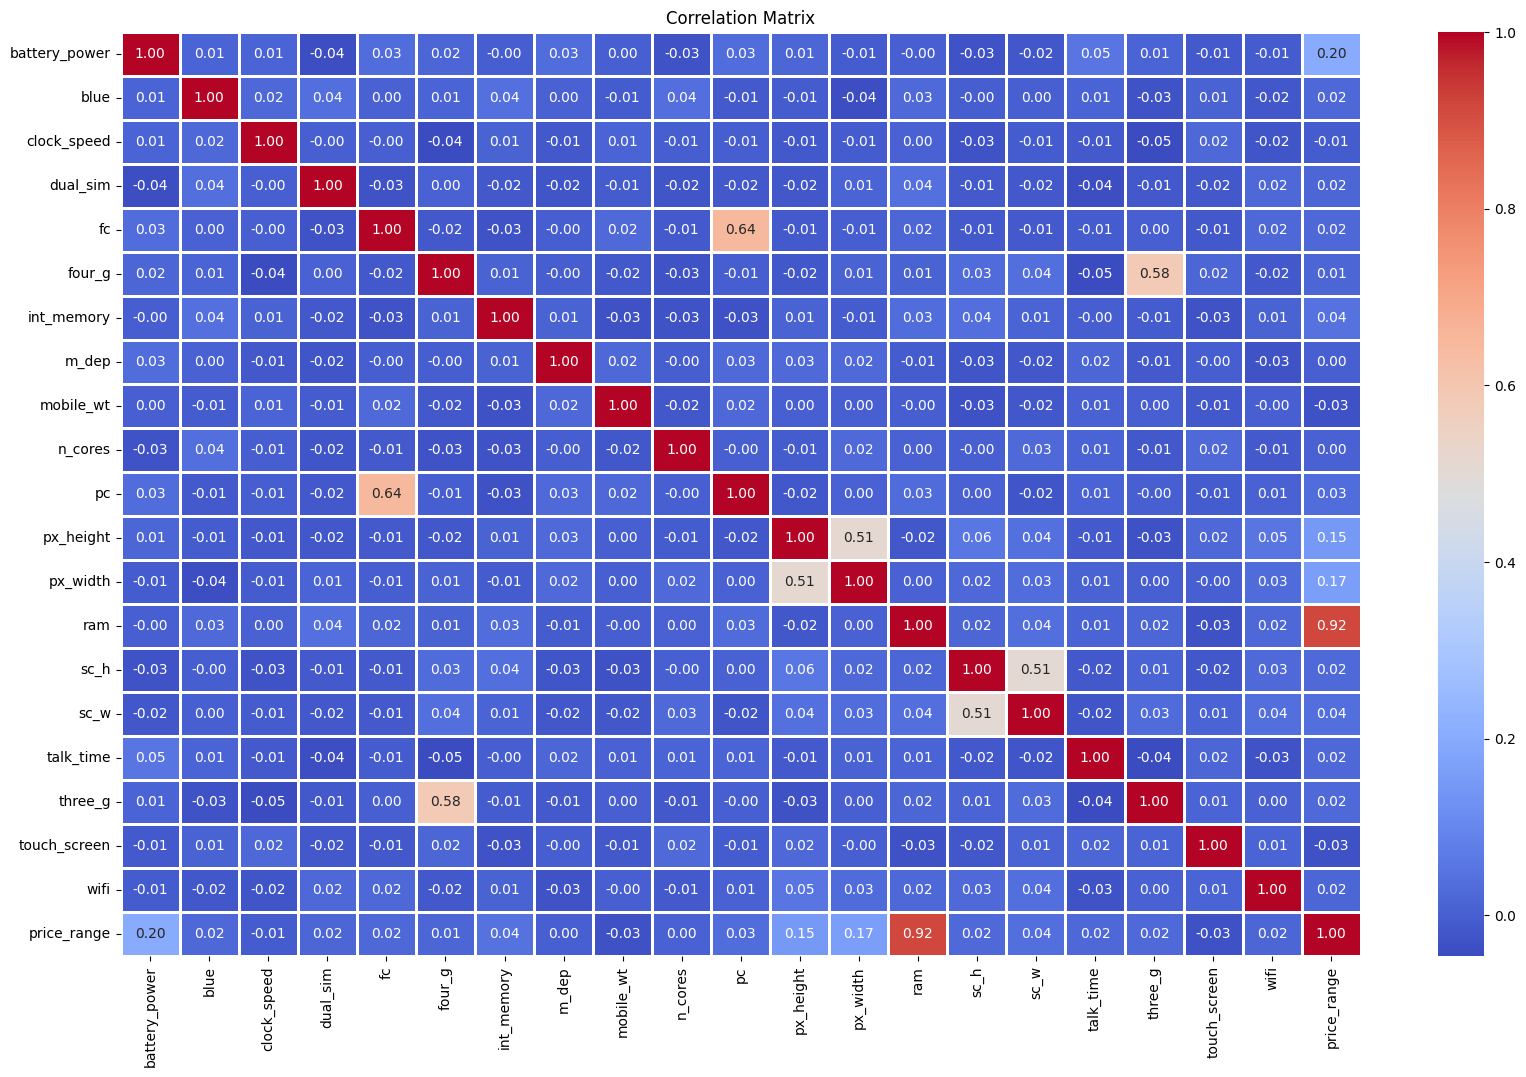

In [6]:
plt.figure(figsize=(20, 12))
sns.heatmap(normalized_minmax.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=2)
plt.title('Correlation Matrix')
plt.show()

In [7]:
def VisualizePcaProjection(finalDf, targetColumn):
    fig = plt.figure(figsize = (20,12))
    ax = fig.add_subplot(1,1,1) 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_title('4 component PCA', fontsize = 20)
    targets = [0, 1, 2, 3]
    colors = ['r', 'g', 'b', 'y']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf[targetColumn] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
                   finalDf.loc[indicesToKeep, 'principal component 2'],
                   c = color, s = 50)
    ax.legend(targets)
    ax.grid()
    plt.show()
    
def VisualizePca3dProjection(finalDf, targetColumn):
    fig = plt.figure(figsize = (20,12))
    ax = fig.add_subplot(111, projection='3d') 
    ax.set_xlabel('Principal Component 1', fontsize = 15)
    ax.set_ylabel('Principal Component 2', fontsize = 15)
    ax.set_zlabel('Principal Component 3', fontsize = 15)
    ax.set_title('4 component PCA', fontsize = 20)
    targets = [0, 1, 2, 3]
    colors = ['r', 'g', 'b', 'y']
    for target, color in zip(targets,colors):
        indicesToKeep = finalDf[targetColumn] == target
        ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1'],
                   finalDf.loc[indicesToKeep, 'principal component 2'],
                   finalDf.loc[indicesToKeep, 'principal component 3'],
                   c = color, s = 50)
    ax.legend(targets)
    ax.grid()
    plt.show()

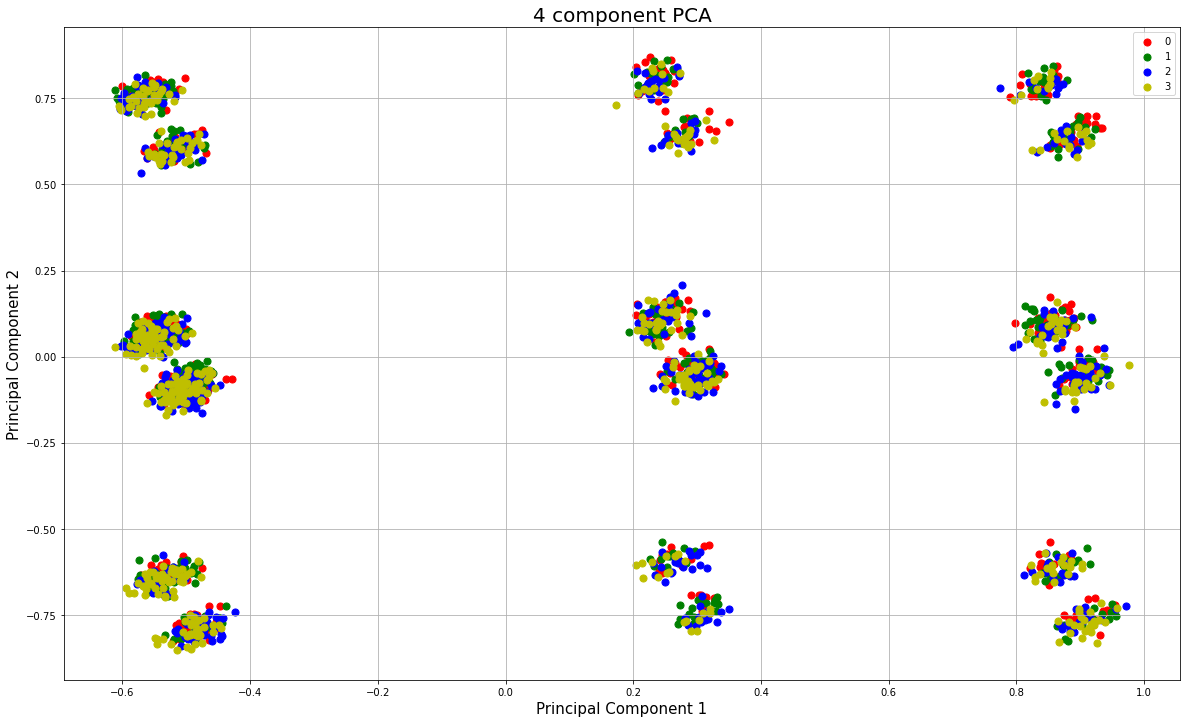

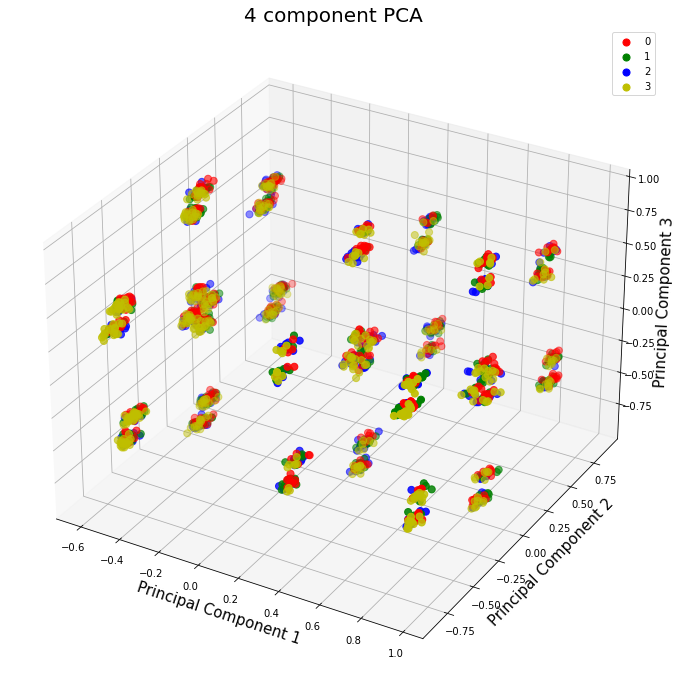

In [10]:
# PCA
# pca = PCA(n_components=2)
pca = PCA()
pca3d = PCA(n_components=3)
principalComponents = pca.fit_transform(x_minmax)

principalComponents3d = pca3d.fit_transform(x_minmax)
# print('Explained variance ratio:')
# print(pca.explained_variance_ratio_.tolist())
# print(x_minmax)

# Create a DataFrame with the two principal components = memory intern and ram

principalDf = pd.DataFrame(data = principalComponents[:, 0:2], columns = ['principal component 1', 'principal component 2'])
principalDf3d = pd.DataFrame(data = principalComponents3d[:, 0:3], columns = ['principal component 1', 'principal component 2', 'principal component 3'])

finalDf = pd.concat([principalDf, df[[target]]], axis = 1)
finalDf3 = pd.concat([principalDf3d, df[[target]]], axis = 1)
# finalDf.describe()

VisualizePcaProjection(finalDf, target)
VisualizePca3dProjection(finalDf3, target)
# VisualizePca3dProjection(finalDf, target)

In [9]:
#price_range: This is the target variable with value of 0(low cost), 1(medium cost), 2(high cost) and 3(very high cost).
#checar balanceamento do target
# 0 - 500
# 1 - 500
# 2 - 500
# 3 - 500
df[target].value_counts()

price_range
1    500
2    500
3    500
0    500
Name: count, dtype: int64